In [1]:
import pandas as pd
happiness2015 = pd.read_csv('C:/Users/Stephen/Google Drive/Dataq/dq_datasets/World_Happiness_2015.csv')

info = happiness2015.info()
first_5 = happiness2015.head(5)
print(info)
print(first_5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
Country                          158 non-null object
Region                           158 non-null object
Happiness Rank                   158 non-null int64
Happiness Score                  158 non-null float64
Standard Error                   158 non-null float64
Economy (GDP per Capita)         158 non-null float64
Family                           158 non-null float64
Health (Life Expectancy)         158 non-null float64
Freedom                          158 non-null float64
Trust (Government Corruption)    158 non-null float64
Generosity                       158 non-null float64
Dystopia Residual                158 non-null float64
dtypes: float64(9), int64(1), object(2)
memory usage: 14.9+ KB
None
       Country          Region  Happiness Rank  Happiness Score  \
0  Switzerland  Western Europe               1            7.587   
1      Iceland  Western Europe               2   

In [2]:
happiness2015['Happiness Score'].plot(kind='bar', title='Happiness Scores', ylim=(0,10))

In [3]:
happiness2015['Region'].unique()

array(['Western Europe', 'North America', 'Australia and New Zealand',
       'Middle East and Northern Africa', 'Latin America and Caribbean',
       'Southeastern Asia', 'Central and Eastern Europe', 'Eastern Asia',
       'Sub-Saharan Africa', 'Southern Asia'], dtype=object)

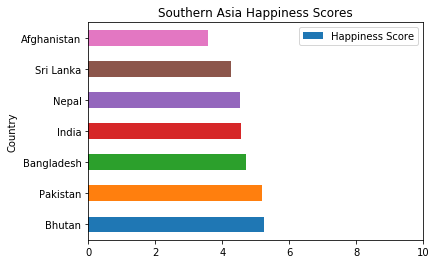

In [4]:
so_asia = happiness2015[happiness2015['Region'] == 'Southern Asia']
so_asia.plot(x='Country', y='Happiness Score', kind='barh', title='Southern Asia Happiness Scores', xlim=(0,10))

`Gropuby` datastructure

In [5]:
mean_happiness = {}
regions = happiness2015['Region'].unique()
print(regions)
for r in regions:
    #1 split the dataframe into groups
    region_group = happiness2015[happiness2015['Region'] == r]
    #2 apply a function to each group
    region_mean = region_group['Happiness Score'].mean()
    #3 combine the result into one data structure
    mean_happiness[r] = region_mean
    
print(mean_happiness)

['Western Europe' 'North America' 'Australia and New Zealand'
 'Middle East and Northern Africa' 'Latin America and Caribbean'
 'Southeastern Asia' 'Central and Eastern Europe' 'Eastern Asia'
 'Sub-Saharan Africa' 'Southern Asia']
{'Western Europe': 6.689619047619048, 'North America': 7.273, 'Australia and New Zealand': 7.285, 'Middle East and Northern Africa': 5.406899999999999, 'Latin America and Caribbean': 6.144681818181818, 'Southeastern Asia': 5.317444444444445, 'Central and Eastern Europe': 5.332931034482758, 'Eastern Asia': 5.626166666666666, 'Sub-Saharan Africa': 4.202800000000001, 'Southern Asia': 4.580857142857143}


In [6]:
happiness2015['Region'].value_counts()
happiness2015.groupby('Region')

grouped = happiness2015.groupby('Region')
grouped.get_group('North America')

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
14,United States,North America,15,7.119,0.03839,1.39451,1.24711,0.86179,0.54604,0.15890,0.40105,2.51011


In [7]:
grouped.groups

{'Australia and New Zealand': Int64Index([8, 9], dtype='int64'),
 'Central and Eastern Europe': Int64Index([ 30,  43,  44,  51,  53,  54,  55,  58,  59,  61,  63,  68,  69,
              72,  76,  79,  82,  85,  86,  88,  92,  94,  95, 103, 105, 110,
             126, 129, 133],
            dtype='int64'),
 'Eastern Asia': Int64Index([37, 45, 46, 71, 83, 99], dtype='int64'),
 'Latin America and Caribbean': Int64Index([ 11,  13,  15,  22,  24,  26,  29,  31,  32,  39,  40,  41,  42,
              47,  50,  52,  56,  57,  64,  97, 104, 118],
            dtype='int64'),
 'Middle East and Northern Africa': Int64Index([ 10,  19,  21,  27,  34,  38,  48,  62,  67,  75,  81,  91, 102,
             106, 107, 109, 111, 134, 135, 155],
            dtype='int64'),
 'North America': Int64Index([4, 14], dtype='int64'),
 'Southeastern Asia': Int64Index([23, 33, 60, 73, 74, 89, 98, 128, 144], dtype='int64'),
 'Southern Asia': Int64Index([78, 80, 108, 116, 120, 131, 152], dtype='int64'),
 'Sub-Saharan

`north_america = happiness2015.iloc[[4,14]]` and `na_group = grouped.get_group('North America')` is same

In [8]:
grouped = happiness2015.groupby('Region')
north_america = happiness2015.iloc[[4,14]]
print(north_america)
na_group = grouped.get_group('North America')
print(na_group)
equal = north_america == na_group
print(equal)

          Country         Region  Happiness Rank  Happiness Score  \
4          Canada  North America               5            7.427   
14  United States  North America              15            7.119   

    Standard Error  Economy (GDP per Capita)   Family  \
4          0.03553                   1.32629  1.32261   
14         0.03839                   1.39451  1.24711   

    Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
4                    0.90563  0.63297                        0.32957   
14                   0.86179  0.54604                        0.15890   

    Generosity  Dystopia Residual  
4      0.45811            2.45176  
14     0.40105            2.51011  
          Country         Region  Happiness Rank  Happiness Score  \
4          Canada  North America               5            7.427   
14  United States  North America              15            7.119   

    Standard Error  Economy (GDP per Capita)   Family  \
4          0.03553            

In [9]:
grouped = happiness2015.groupby('Region')
grouped.size()

Region
Australia and New Zealand           2
Central and Eastern Europe         29
Eastern Asia                        6
Latin America and Caribbean        22
Middle East and Northern Africa    20
North America                       2
Southeastern Asia                   9
Southern Asia                       7
Sub-Saharan Africa                 40
Western Europe                     21
dtype: int64

In [10]:
grouped = happiness2015.groupby('Region')
happy_grouped = grouped['Happiness Score']
happy_mean = happy_grouped.mean()
happy_mean


Region
Australia and New Zealand          7.285000
Central and Eastern Europe         5.332931
Eastern Asia                       5.626167
Latin America and Caribbean        6.144682
Middle East and Northern Africa    5.406900
North America                      7.273000
Southeastern Asia                  5.317444
Southern Asia                      4.580857
Sub-Saharan Africa                 4.202800
Western Europe                     6.689619
Name: Happiness Score, dtype: float64

`groupby.agg()` method cand perform both aggregation at once.

In [11]:
import numpy as np
grouped = happiness2015.groupby('Region')
happy_grouped = grouped['Happiness Score']
def dif(group):
    return (group.max() - group.mean())

happy_mean_max = happy_grouped.agg([np.mean, np.max])
happy_max_dif = happy_grouped.agg(dif)
print(happy_mean_max)
print(happy_max_dif)

                                     mean   amax
Region                                          
Australia and New Zealand        7.285000  7.286
Central and Eastern Europe       5.332931  6.505
Eastern Asia                     5.626167  6.298
Latin America and Caribbean      6.144682  7.226
Middle East and Northern Africa  5.406900  7.278
North America                    7.273000  7.427
Southeastern Asia                5.317444  6.798
Southern Asia                    4.580857  5.253
Sub-Saharan Africa               4.202800  5.477
Western Europe                   6.689619  7.587
Region
Australia and New Zealand          0.001000
Central and Eastern Europe         1.172069
Eastern Asia                       0.671833
Latin America and Caribbean        1.081318
Middle East and Northern Africa    1.871100
North America                      0.154000
Southeastern Asia                  1.480556
Southern Asia                      0.672143
Sub-Saharan Africa                 1.274200
Western E

In [12]:
happiness_means = happiness2015.groupby('Region')['Happiness Score'].mean()

print(happiness_means)

Region
Australia and New Zealand          7.285000
Central and Eastern Europe         5.332931
Eastern Asia                       5.626167
Latin America and Caribbean        6.144682
Middle East and Northern Africa    5.406900
North America                      7.273000
Southeastern Asia                  5.317444
Southern Asia                      4.580857
Sub-Saharan Africa                 4.202800
Western Europe                     6.689619
Name: Happiness Score, dtype: float64


In [13]:
pv_happiness = happiness2015.pivot_table(values='Happiness Score'
                                         , index='Region', aggfunc=np.mean, margins=True)
print(pv_happiness)

                                 Happiness Score
Region                                          
Australia and New Zealand               7.285000
Central and Eastern Europe              5.332931
Eastern Asia                            5.626167
Latin America and Caribbean             6.144682
Middle East and Northern Africa         5.406900
North America                           7.273000
Southeastern Asia                       5.317444
Southern Asia                           4.580857
Sub-Saharan Africa                      4.202800
Western Europe                          6.689619
All                                     5.375734


5.3757341772151905


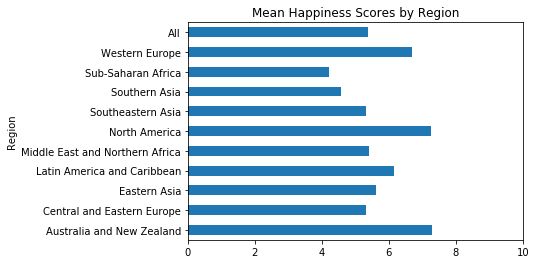

In [14]:
pv_happiness = happiness2015.pivot_table(values='Happiness Score', index='Region', aggfunc=np.mean, margins=True)

# pv_happiness = happiness2015.pivot_table('Happiness Score', 'Region')
pv_happiness.plot(kind='barh', title='Mean Happiness Scores by Region', xlim=(0,10), legend=False)

world_mean_happiness = happiness2015['Happiness Score'].mean()
print(world_mean_happiness)

In [15]:
happiness2015.pivot_table(['Happiness Score', 'Family'], 'Region')

,Family,Happiness Score
Region,,
Australia and New Zealand,1.314450,7.285000
Central and Eastern Europe,1.053042,5.332931
Eastern Asia,1.099427,5.626167
Latin America and Caribbean,1.104720,6.144682
Middle East and Northern Africa,0.920490,5.406900
North America,1.284860,7.273000
Southeastern Asia,0.940468,5.317444
Southern Asia,0.645321,4.580857
Sub-Saharan Africa,0.809085,4.202800


to add `aggfunction` to apply multiple function

In [16]:
happiness2015.pivot_table(['Happiness Score', 'Family'], 'Region'
                          , aggfunc=[np.mean, np.min, np.max], margins=True)

mean                     amin  \
                                   Family Happiness Score   Family   
Region                                                               
Australia and New Zealand        1.314450        7.285000  1.30923   
Central and Eastern Europe       1.053042        5.332931  0.38562   
Eastern Asia                     1.099427        5.626167  0.94675   
Latin America and Caribbean      1.104720        6.144682  0.74302   
Middle East and Northern Africa  0.920490        5.406900  0.47489   
North America                    1.284860        7.273000  1.24711   
Southeastern Asia                0.940468        5.317444  0.62736   
Southern Asia                    0.645321        4.580857  0.30285   
Sub-Saharan Africa               0.809085        4.202800  0.00000   
Western Europe                   1.247302        6.689619  0.89318   
All                              0.991046        5.375734  0.00000   

                                                    amax                  
                                Happiness Score   Family Happiness Score  
Region                                                                    
Australia and New Zealand                 7.284  1.31967           7.286  
Central and Eastern Europe                4.218  1.34043           6.505  
Eastern Asia                              4.874  1.30060           6.298  
Latin America and Caribbean               4.518  1.30477           7.226  
Middle East and Northern Africa           3.006  1.22393           7.278  
North America                             7.119  1.32261           7.427  
Southeastern Asia                         3.819  1.26504           6.798  
Southern Asia                             3.575  1.10395           5.253  
Sub-Saharan Africa                        2.839  1.18468           5.477  
Western Europe                            4.857  1.40223           7.587  
All                                       2.839  1.40223           7.587

In [21]:
grouped = happiness2015.groupby('Region')
grouped = grouped['Happiness Score', 'Family']
happy_family_stats = grouped.agg([np.min, np.max, np.mean])
print(happy_family_stats)

# use pivot_tatble to return same result
pv_happy_family_stats = happiness2015.pivot_table(['Happiness Score','Family'], 'Region'
                                                  , aggfunc=[np.min, np.max, np.mean], margins=True)
print(pv_happy_family_stats)

                                Happiness Score                    Family  \
                                           amin   amax      mean     amin   
Region                                                                      
Australia and New Zealand                 7.284  7.286  7.285000  1.30923   
Central and Eastern Europe                4.218  6.505  5.332931  0.38562   
Eastern Asia                              4.874  6.298  5.626167  0.94675   
Latin America and Caribbean               4.518  7.226  6.144682  0.74302   
Middle East and Northern Africa           3.006  7.278  5.406900  0.47489   
North America                             7.119  7.427  7.273000  1.24711   
Southeastern Asia                         3.819  6.798  5.317444  0.62736   
Southern Asia                             3.575  5.253  4.580857  0.30285   
Sub-Saharan Africa                        2.839  5.477  4.202800  0.00000   
Western Europe                            4.857  7.587  6.689619  0.89318   